In [1]:
# 분산분석이란,
# 관축값들이 달라지는 것을 여러 요인으로 나누어
# 각 요인들이 얼마나 변화의 정도에 기여하였는가를 분석하는 방법

In [2]:
# 요인의 수가 하나라면, 일원배치분산분석으로, 셋 이상의 집단의 모평균이 동일한지 검정할 수 있는 방법
# 요인의 수가 2개라면, 이원배치분산분석

In [4]:
# 일원배치 분산분석
data = {'x':[0.95,0.86,0.71,0.72,0.74,
            0.71,0.85,0.62,0.72,0.64,
            0.69,0.68,0.51,0.63,0.44],
       'group':[1,1,1,1,1,2,2,2,2,2,3,3,3,3,3]}

import pandas as pd
Data = pd.DataFrame(data)
print(Data)

       x  group
0   0.95      1
1   0.86      1
2   0.71      1
3   0.72      1
4   0.74      1
5   0.71      2
6   0.85      2
7   0.62      2
8   0.72      2
9   0.64      2
10  0.69      3
11  0.68      3
12  0.51      3
13  0.63      3
14  0.44      3


In [5]:
X1 = Data.loc[Data.group==1,'x']
X2 = Data.loc[Data.group==2,'x']
X3 = Data.loc[Data.group==3,'x']

In [7]:
# 정규성확인
# 각 데이터셋의 정규성 확인을 위해 shapiro()하수를 적용

from scipy.stats import shapiro, levene, bartlett

shapiro(X1)

ShapiroResult(statistic=0.8469260334968567, pvalue=0.18499600887298584)

In [8]:
shapiro(X2)

ShapiroResult(statistic=0.9071149826049805, pvalue=0.4504486918449402)

In [9]:
shapiro(X3) # 유의확률이 0.05보다 크므로 귀무가설을 채택하므로 정규성을 만족한다

ShapiroResult(statistic=0.8832945823669434, pvalue=0.32450810074806213)

In [10]:
# 등분산 검정
# levene(), bartlett() 함수 이용
levene(X1,X2,X3) # 유의확률이 0.05보다 크므로 귀무가설을 채택하므로 등분산성을 만족한다

LeveneResult(statistic=0.11320754716981142, pvalue=0.8939076596969161)

In [11]:
bartlett(X1,X2,X3) # 유의확률이 0.05보다 크므로 귀무가설을 채택하므로 등분산성을 만족한다

BartlettResult(statistic=0.14900048391088347, pvalue=0.9282072494741611)

In [12]:
import numpy as np
print("one_sample 평균1) ", np.mean(X1))
print("one_sample 평균2) ", np.mean(X2))
print("one_sample 평균3) ", np.mean(X3))
print("one_sample 표준편차1) ", np.std(X1))
print("one_sample 표준편차2) ", np.std(X2))
print("one_sample 표준편차3) ", np.std(X3))

one_sample 평균1)  0.796
one_sample 평균2)  0.7080000000000001
one_sample 평균3)  0.5900000000000001
one_sample 표준편차1)  0.09393614852653902
one_sample 표준편차2)  0.08084553172563094
one_sample 표준편차3)  0.0985900603509299


In [13]:
from scipy.stats import f_oneway
result = f_oneway(X1,X2,X3)

print("F 검정 통계량: %.5f, p값: %.5f"%result) # 유의확률이 0.05보다 작으므로, 귀무가설을 기각하고, 
# 세 집단의 평균차이가 있음을 알 수 있다

# 첨가물 A,B,C 각각을 넣어 만든 빵 중 적어도 1가지는 빵의 평균밀도에
# 통계적으로 유의한 차이가 있다는 것을 의미

F 검정 통계량: 5.11196, p값: 0.02478


In [14]:
# 사후분석
# f_oneway()함수를 이용한 anova 분석은 각 집단별로 차이가 있는지 여부만 확인할 수 있을뿐
# 어떤 집단과 어떤 집단에 차이가 있는지 확인이 불가

# 그래서,

# statsmodels.formula.api 모듈을 활용하면,
# 연속형변수인 반응변수와 그룹변수인 요인을 확용한 회귀모형을 생성
# -> 분산분석표 및 가설검정을 확인하기 위한 함수에 적용

In [16]:
# 1. 회귀모형 생성
# ols.fit() 함수를 이용해 회귀모형 생성
# from statsmodels.formula.api import ols

!pip install statsmodels
from statsmodels.formula.api import ols
lmFit = ols('x~C(group)', data=Data).fit()

     ---------------------------------------- 9.1/9.1 MB 5.4 MB/s eta 0:00:00
     -------------------------------------- 233.9/233.9 kB 4.8 MB/s eta 0:00:00


In [17]:
print(lmFit.summary())

                            OLS Regression Results                            
Dep. Variable:                      x   R-squared:                       0.460
Model:                            OLS   Adj. R-squared:                  0.370
Method:                 Least Squares   F-statistic:                     5.112
Date:                Tue, 22 Oct 2024   Prob (F-statistic):             0.0248
Time:                        16:01:04   Log-Likelihood:                 14.598
No. Observations:                  15   AIC:                            -23.20
Df Residuals:                      12   BIC:                            -21.07
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
Intercept         0.7960      0.046     17.412

C:\Users\M\.conda\envs\cospropython\lib\site-packages\scipy\stats\stats.py:1542: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=15
  "anyway, n=%i" % int(n))


In [19]:
# 분산분석표 생성
# 생성된 ols 객체에 anova_lm() 함수를 적용
# from statsmodels.stats.anova import anova_lm 
# anova_lm(ols객체)

from statsmodels.stats.anova import anova_lm
table = anova_lm(lmFit)

print(table)

            df   sum_sq  mean_sq         F    PR(>F)
C(group)   2.0  0.10684  0.05342  5.111962  0.024784
Residual  12.0  0.12540  0.01045       NaN       NaN


In [20]:
# 사후분석:본페로니 방법
# statsmodels.sandbox.stats.multicomp 모듈의
# MultiComparison() 함수 및 allpairtest() 함수 이용

from statsmodels.sandbox.stats.multicomp import MultiComparison
comp = MultiComparison(Data.x, Data.group)

from scipy.stats import ttest_ind
result = comp.allpairtest(ttest_ind, method='bonf')

print(result[0]) # 그룹1과 그룹3에 평균차이가 존재함을 알 수 있다

Test Multiple Comparison ttest_ind 
FWER=0.05 method=bonf
alphacSidak=0.02, alphacBonf=0.017
group1 group2  stat   pval  pval_corr reject
--------------------------------------------
     1      2 1.4201 0.1934    0.5801  False
     1      3 3.0255 0.0164    0.0493   True
     2      3  1.851 0.1013     0.304  False
--------------------------------------------


In [21]:
# 사후분석 : Tukey HSD 방법
# statsmodels.stats.multicomp 모듈의 pairwise_tukeyhsd() 함수 이용

from statsmodels.stats.multicomp import pairwise_tukeyhsd
posthoc1 = pairwise_tukeyhsd(Data.x, Data.group, alpha=0.05)

print(posthoc1) # 그룹1과 그룹3에 평균차이가 존재함을 알 수 있다

Multiple Comparison of Means - Tukey HSD, FWER=0.05 
group1 group2 meandiff p-adj   lower   upper  reject
----------------------------------------------------
     1      2   -0.088 0.3907 -0.2605  0.0845  False
     1      3   -0.206 0.0199 -0.3785 -0.0335   True
     2      3   -0.118 0.2032 -0.2905  0.0545  False
----------------------------------------------------


Figure(1000x600)


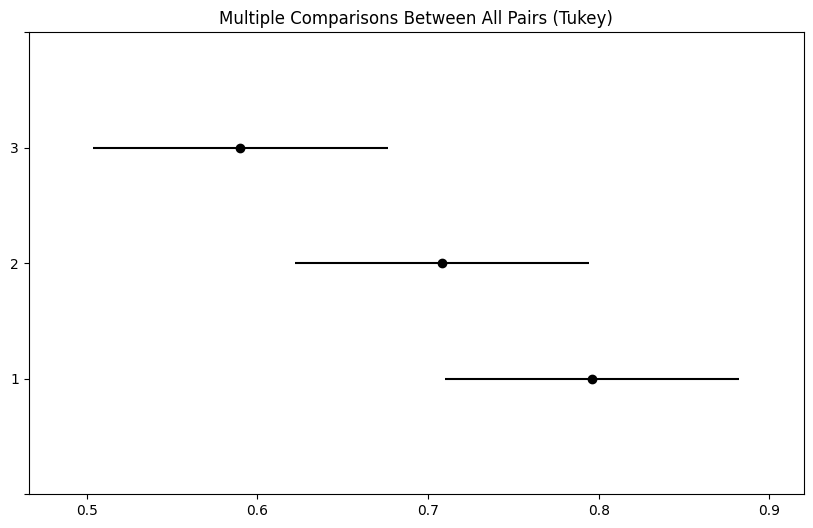

In [22]:
print(posthoc1.plot_simultaneous()) # 첫번째 그룹과 세번째 그룹의 그래프가 겹치지 않아 두 그룹 사이에 차이가 있음을 확인 가능

In [24]:
# 데이터분석 실습
# 1. f_oneway() 함수를 이용한 가설검정
import seaborn as sns
df = sns.load_dataset('iris')
print(df)

     sepal_length  sepal_width  petal_length  petal_width    species
0             5.1          3.5           1.4          0.2     setosa
1             4.9          3.0           1.4          0.2     setosa
2             4.7          3.2           1.3          0.2     setosa
3             4.6          3.1           1.5          0.2     setosa
4             5.0          3.6           1.4          0.2     setosa
..            ...          ...           ...          ...        ...
145           6.7          3.0           5.2          2.3  virginica
146           6.3          2.5           5.0          1.9  virginica
147           6.5          3.0           5.2          2.0  virginica
148           6.2          3.4           5.4          2.3  virginica
149           5.9          3.0           5.1          1.8  virginica

[150 rows x 5 columns]


In [25]:
# info()함수를 활용하여 결측자료 확인
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   sepal_length  150 non-null    float64
 1   sepal_width   150 non-null    float64
 2   petal_length  150 non-null    float64
 3   petal_width   150 non-null    float64
 4   species       150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB


In [26]:
Species_Set = df.loc[df.species=="setosa",'sepal_width']
print(Species_Set.head())

0    3.5
1    3.0
2    3.2
3    3.1
4    3.6
Name: sepal_width, dtype: float64


In [27]:
Species_Ver = df.loc[df.species=="versicolor",'sepal_width']
print(Species_Ver.head())

50    3.2
51    3.2
52    3.1
53    2.3
54    2.8
Name: sepal_width, dtype: float64


In [28]:
Species_Vir = df.loc[df.species=="virginica",'sepal_width']
print(Species_Vir.head())

100    3.3
101    2.7
102    3.0
103    2.9
104    3.0
Name: sepal_width, dtype: float64


In [29]:
# 각각의 자료에 대한 정규성 검증
from scipy.stats import shapiro, levene, bartlett

shapiro(Species_Set)

ShapiroResult(statistic=0.97171950340271, pvalue=0.2715264856815338)

In [30]:
shapiro(Species_Ver)

ShapiroResult(statistic=0.9741330742835999, pvalue=0.33798879384994507)

In [31]:
shapiro(Species_Vir) # 모두 유의확률이 0.05보다 크므로 귀무가설을 채택하므로 정규성을 띄는 것을 알 수 있다

ShapiroResult(statistic=0.9673910140991211, pvalue=0.1809043288230896)

In [32]:
# 등분산성 검정
levene(Species_Set, Species_Ver, Species_Vir)

LeveneResult(statistic=0.5902115655853319, pvalue=0.5555178984739075)

In [33]:
bartlett(Species_Set, Species_Ver, Species_Vir) # 유의확률이 0.05보다 크므로 귀무가설을 채택하므로 등분산임을 알 수 있다

BartlettResult(statistic=2.0910752014392338, pvalue=0.35150280041580323)

In [34]:
import numpy as np

print("one_sample 평균1) ", np.mean(Species_Set))
print("one_sample 평균2) ", np.mean(Species_Ver))
print("one_sample 평균3) ", np.mean(Species_Vir))
print("one_sample 표준편차1) ", np.std(Species_Set))
print("one_sample 표준편차2) ", np.std(Species_Ver))
print("one_sample 표준편차3) ", np.std(Species_Vir))

one_sample 평균1)  3.428
one_sample 평균2)  2.7700000000000005
one_sample 평균3)  2.974
one_sample 표준편차1)  0.37525458025186054
one_sample 표준편차2)  0.31064449134018135
one_sample 표준편차3)  0.3192553836664309


In [35]:
from scipy.stats import f_oneway
result = f_oneway(Species_Set, Species_Ver, Species_Vir)

print("F 검정통계량 : %.5f, p값: %.5f"%result) 
# 유의확률이 0.0000이므로 귀무가설을 기각하므로 붓꽃종 사이에 적어도 하나는 꽃받침너비가 다르다라는 것을 알 수 있다

F 검정통계량 : 49.16004, p값: 0.00000


In [36]:
# statsmodel 모듈을 활용한 가설검정 및 사후분석
from statsmodels.formula.api import ols
lmFit = ols('sepal_width~C(species)', data=df).fit()

In [38]:
print(lmFit.summary())

                            OLS Regression Results                            
Dep. Variable:            sepal_width   R-squared:                       0.401
Model:                            OLS   Adj. R-squared:                  0.393
Method:                 Least Squares   F-statistic:                     49.16
Date:                Tue, 22 Oct 2024   Prob (F-statistic):           4.49e-17
Time:                        17:27:36   Log-Likelihood:                -49.366
No. Observations:                 150   AIC:                             104.7
Df Residuals:                     147   BIC:                             113.8
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                               coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------
Intercept               

In [39]:
from statsmodels.stats.anova import anova_lm
table = anova_lm(lmFit)

print(table) # f_oneway의 결과와 유사함을 알 수 있다

               df     sum_sq   mean_sq         F        PR(>F)
C(species)    2.0  11.344933  5.672467  49.16004  4.492017e-17
Residual    147.0  16.962000  0.115388       NaN           NaN


In [40]:
# 사후분석

from statsmodels.sandbox.stats.multicomp import MultiComparison
comp = MultiComparison(df.sepal_width, df.species)

In [41]:
# Bonferni검정
from scipy.stats import ttest_ind
result = comp.allpairtest(ttest_ind, method='bonf')

In [42]:
print(result[0])
# setosa와 versicolor
# setosa와 virginica
# versicolor와 virginica 모두 차이가 있음을 알 수 있다

Test Multiple Comparison ttest_ind 
FWER=0.05 method=bonf
alphacSidak=0.02, alphacBonf=0.017
  group1     group2     stat   pval  pval_corr reject
-----------------------------------------------------
    setosa versicolor   9.455    0.0       0.0   True
    setosa  virginica  6.4503    0.0       0.0   True
versicolor  virginica -3.2058 0.0018    0.0055   True
-----------------------------------------------------


In [43]:
# TukeyHSD 방법 이용
from statsmodels.stats.multicomp import pairwise_tukeyhsd
posthoc1 = pairwise_tukeyhsd(df.sepal_width, df.species, alpha=0.05)

print(posthoc1)
# setosa와 versicolor
# setosa와 virginica
# versicolor와 virginica 모두 차이가 있음을 알 수 있다

    Multiple Comparison of Means - Tukey HSD, FWER=0.05     
  group1     group2   meandiff p-adj   lower   upper  reject
------------------------------------------------------------
    setosa versicolor   -0.658    0.0 -0.8189 -0.4971   True
    setosa  virginica   -0.454    0.0 -0.6149 -0.2931   True
versicolor  virginica    0.204 0.0088  0.0431  0.3649   True
------------------------------------------------------------


Figure(1000x600)


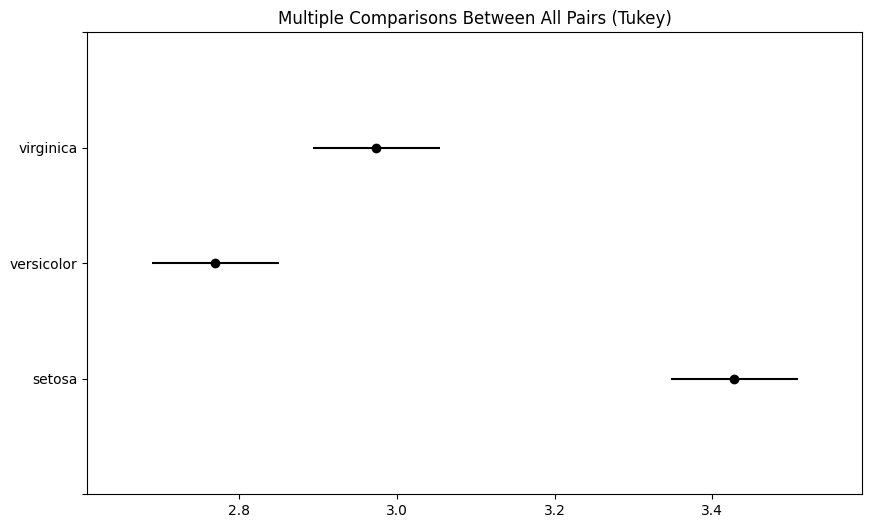

In [44]:
print(posthoc1.plot_simultaneous())